In [3]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./../')
from src.models.continual_training import load_dataset_safe

hf_datasets = "./../data/hf_datasets"

ds = load_dataset_safe(hf_datasets, "ExponentialScience/DLT-Sentiment-News")

df = ds.to_pandas()
df.head()

,timestamp,title,description,text,market_direction,engagement_quality,content_characteristics,vote_counts,total_votes,source_url,url,total_tokens
0,2022-06-09 04:00:43,Optimism Foundation sends $20M to the wrong wa...,The Optimism Foundation has issued a statement...,Optimism Foundation sends $20M to the wrong wa...,1,1,2,"{'bearish': 1, 'bullish': 0, 'liked': 3, 'disl...",4,https://cryptoslate.com/optimism-foundation-se...,https://cryptopanic.com/news/15442200/Optimism...,76
1,2022-06-09 03:31:47,75% of retailers eyeing crypto payments within...,"Improving customer experience, increasing the ...",75% of retailers eyeing crypto payments within...,2,1,1,"{'bearish': 0, 'bullish': 6, 'liked': 4, 'disl...",3,https://cointelegraph.com/news/75-of-retailers...,https://cryptopanic.com/news/15442145/75-of-re...,53
2,2022-06-09 01:22:23,Optimism loses 20M tokens after L1 and L2 conf...,Although the airdrop took place less than two ...,Optimism loses 20M tokens after L1 and L2 conf...,1,2,1,"{'bearish': 6, 'bullish': 0, 'liked': 3, 'disl...",2,https://cointelegraph.com/news/optimism-loses-...,https://cryptopanic.com/news/15441931/Optimism...,52
3,2022-06-08 23:00:19,U.S. Macro Pressure Responsible For Entire Bit...,There have been multiple sell-off trends recor...,U.S. Macro Pressure Responsible For Entire Bit...,1,2,2,"{'bearish': 2, 'bullish': 1, 'liked': 1, 'disl...",1,https://www.newsbtc.com/news/bitcoin/u-s-macro...,https://cryptopanic.com/news/15441620/US-Macro...,774
4,2022-06-08 22:20:11,Ethereum Ropsten Testnet Successfully Merged t...,"Ethereum's oldest testnet, Ropsten, was merged...",Ethereum Ropsten Testnet Successfully Merged t...,2,1,1,"{'bearish': 0, 'bullish': 5, 'liked': 2, 'disl...",2,https://blockworks.co/ethereum-ropsten-testnet...,https://cryptopanic.com/news/15441551/Ethereum...,50


In [ ]:
df[~df['description'].str.len() < 5].shape

(22047071, 6)

In [54]:
df[df["description"] != "-"].shape

(22898, 17)

In [55]:
df[~df['description'].str.len() < 5].shape[0] - df[df["description"] != "-"].shape[0]

1065

### Filter rows

In [4]:
df = df[df["description"] != "-"]

# Remove rows containing "RT @" at the beginning of the description
df = df[~df['description'].str.startswith('RT @')].copy()

df.shape

(22898, 10)

## Get the data distribution for each labels by loading json data

In [13]:
df_votes = pd.json_normalize(df["vote_counts"])
df = df.merge(df_votes, left_index=True, right_index=True)

# Set timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Add year from timestamp
df["year"] = df["timestamp"].dt.year

df.set_index("year", inplace=True)

df.head()

,timestamp,title,description,market_direction,engagement_quality,content_characteristics,vote_counts,total_votes,source_url,url,bearish,bullish,liked,disliked,important,lol,toxic
year,,,,,,,,,,,,,,,,,
2022,2022-06-09 04:00:43,Optimism Foundation sends $20M to the wrong wa...,The Optimism Foundation has issued a statement...,1,1,2,"{'bearish': 1, 'bullish': 0, 'liked': 3, 'disl...",8,https://cryptoslate.com/optimism-foundation-se...,https://cryptopanic.com/news/15442200/Optimism...,1,0,3,0,1,3,0
2022,2022-06-09 03:31:47,75% of retailers eyeing crypto payments within...,"Improving customer experience, increasing the ...",2,1,1,"{'bearish': 0, 'bullish': 6, 'liked': 4, 'disl...",13,https://cointelegraph.com/news/75-of-retailers...,https://cryptopanic.com/news/15442145/75-of-re...,0,6,4,0,3,0,0
2022,2022-06-09 01:22:23,Optimism loses 20M tokens after L1 and L2 conf...,Although the airdrop took place less than two ...,1,1,1,"{'bearish': 6, 'bullish': 0, 'liked': 3, 'disl...",13,https://cointelegraph.com/news/optimism-loses-...,https://cryptopanic.com/news/15441931/Optimism...,6,0,3,2,2,0,0
2022,2022-06-08 23:00:19,U.S. Macro Pressure Responsible For Entire Bit...,There have been multiple sell-off trends recor...,1,2,2,"{'bearish': 2, 'bullish': 1, 'liked': 1, 'disl...",8,https://www.newsbtc.com/news/bitcoin/u-s-macro...,https://cryptopanic.com/news/15441620/US-Macro...,2,1,1,3,0,1,0
2022,2022-06-08 22:20:11,Ethereum Ropsten Testnet Successfully Merged t...,"Ethereum's oldest testnet, Ropsten, was merged...",2,1,1,"{'bearish': 0, 'bullish': 5, 'liked': 2, 'disl...",9,https://blockworks.co/ethereum-ropsten-testnet...,https://cryptopanic.com/news/15441551/Ethereum...,0,5,2,0,2,0,0


### Data Distribution of Sentiment Labels

<Axes: xlabel='market_direction'>

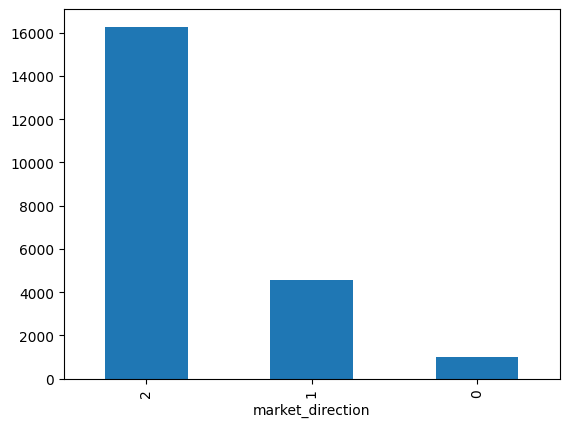

In [14]:
# Gets the data distribution for vote_counts

df['market_direction'].value_counts().plot(kind='bar')

<Axes: xlabel='engagement_quality'>

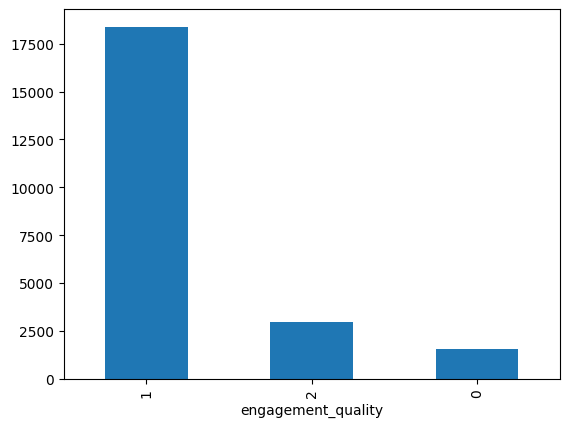

In [10]:
df['engagement_quality'].value_counts().plot(kind='bar')

<Axes: >

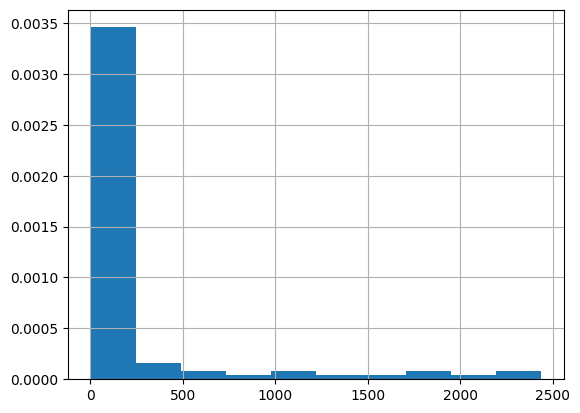

In [15]:
df['bullish'].value_counts().hist(density=True)

In [ ]:
print(min(df['bearish']), max(df['bearish']))


print(min(df['bullish']), max(df['bullish']))

0 113
0 166


## Market sentiment

In [67]:
market = ["bearish", "bullish"]

df_mkt = df[market].copy()

# get the total votes
df_mkt['total_votes'] = df_mkt['bearish'] + df_mkt['bullish']

# set data as index
# df_mkt = df_mkt.stack().reset_index().rename(columns={0: "value", "level_1": "market_sentiment"})

df_mkt.head()

,bearish,bullish,total_votes
year,,,
2022,1,0,1
2022,0,6,6
2022,6,0,6
2022,2,1,3
2022,0,5,5


In [56]:
print(f"Median total votes for market sentiment {df_qual['total_votes'].median()}")

Median total votes for market sentiment 9.0


<Axes: xlabel='year', ylabel='bearish'>

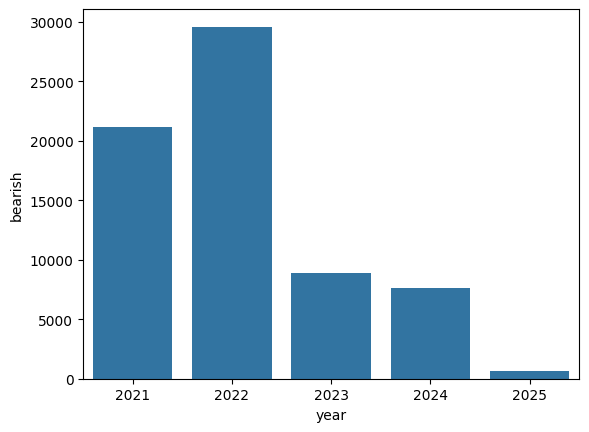

In [17]:

sns.barplot(df, x="year", y="bearish", estimator="sum", errorbar=None)

<Axes: xlabel='year', ylabel='bullish'>

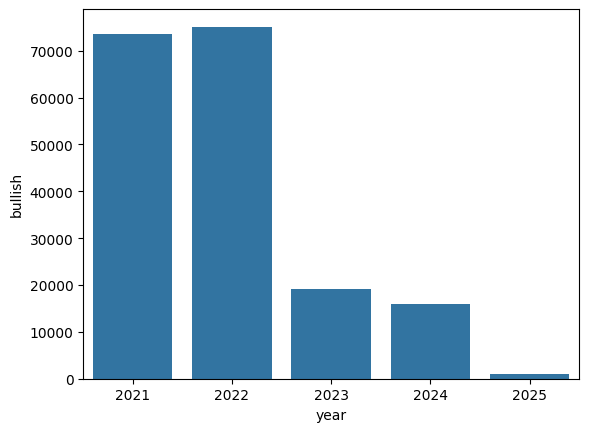

In [10]:
sns.barplot(df, x="year", y="bullish", estimator="sum", errorbar=None)

<Axes: >

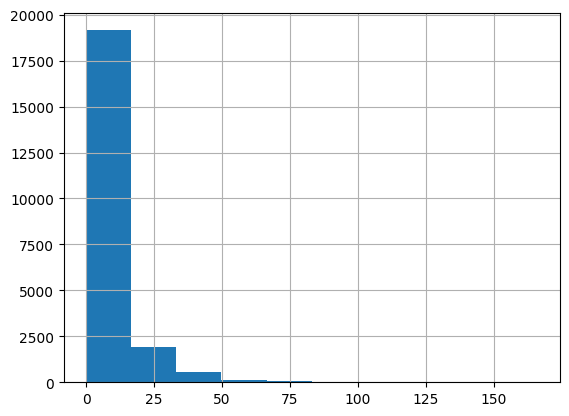

In [18]:
df['bullish'].hist(bins=10)

<Axes: >

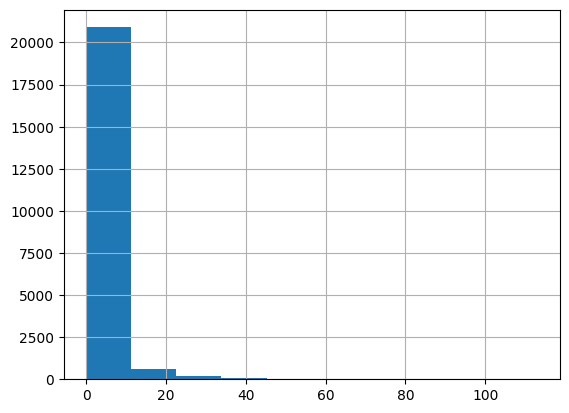

In [19]:
df['bearish'].hist(bins=10)

array([[<Axes: title={'center': 'bearish'}>,
        <Axes: title={'center': 'bullish'}>]], dtype=object)

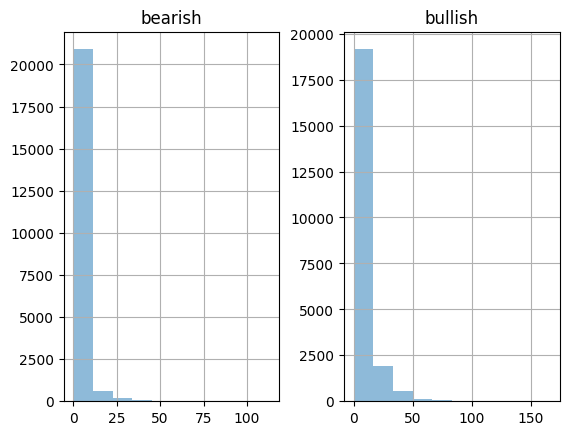

In [20]:
df[['bearish', 'bullish']].hist(alpha=0.5, bins=10)

In [56]:
df_mkt.head()

,bearish,bullish,total_votes
year,,,
2022,1,0,1
2022,0,6,6
2022,6,0,6
2022,2,1,3
2022,0,5,5


array([[<Axes: title={'center': 'bearish'}>,
        <Axes: title={'center': 'bullish'}>]], dtype=object)

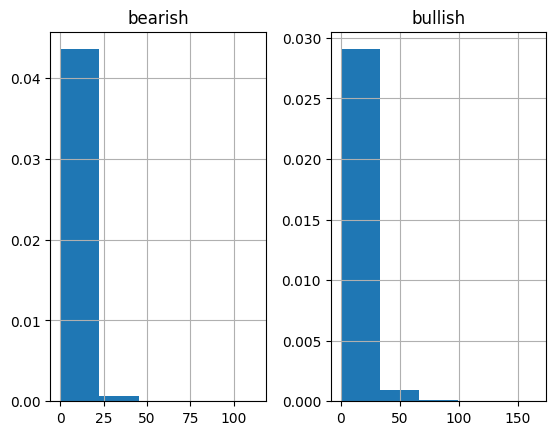

In [65]:
df_mkt[['bearish', 'bullish']].hist(density=True, bins=5)

<Axes: >

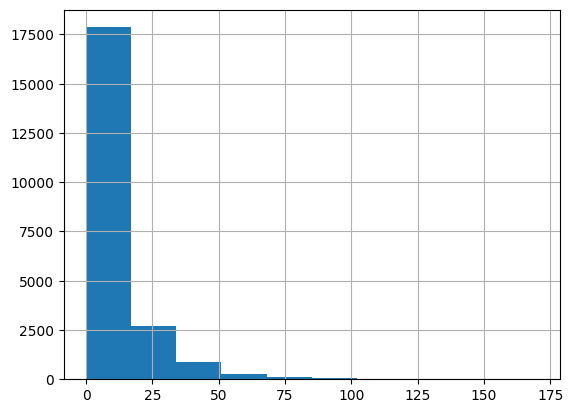

In [78]:
df_mkt['total_votes'].hist()

In [79]:
df_mkt['total_votes'].mean()

np.float64(11.565998902305159)

In [80]:
df_mkt['total_votes'].median()

np.float64(7.0)

### Normalization

In [68]:
# Count total votes
df_mkt['total_votes'] = df_mkt['bearish'] + df_mkt['bullish']

# Normalize bullish and bearish by total votes
df_mkt['bearish_pct'] = df_mkt['bearish'] / df_mkt['total_votes'] * 100
df_mkt['bullish_pct'] = df_mkt['bullish'] / df_mkt['total_votes'] * 100

df_mkt.head()

,bearish,bullish,total_votes,bearish_pct,bullish_pct
year,,,,,
2022,1,0,1,100.000000,0.000000
2022,0,6,6,0.000000,100.000000
2022,6,0,6,100.000000,0.000000
2022,2,1,3,66.666667,33.333333
2022,0,5,5,0.000000,100.000000


array([[<Axes: title={'center': 'bearish_pct'}>,
        <Axes: title={'center': 'bullish_pct'}>]], dtype=object)

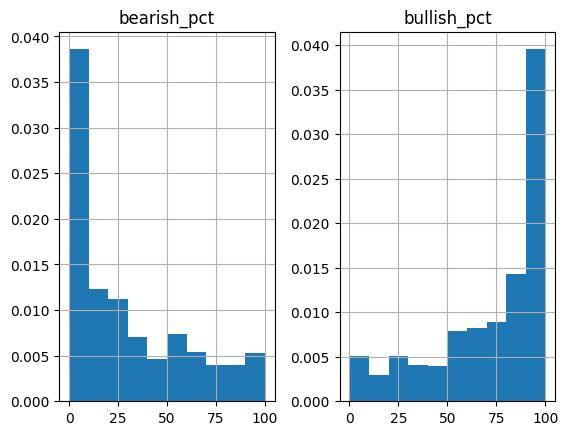

In [69]:
df_mkt[['bearish_pct', 'bullish_pct']].hist(density=True, bins=10)

In [85]:
df_mkt['bullish_pct'].median()

np.float64(81.81818181818183)

In [23]:
df_mkt['bullish'].median()

np.float64(5.0)

In [24]:
df_mkt['bullish'].min()

np.int64(0)

In [86]:
df_mkt['bearish_pct'].median()

np.float64(18.181818181818183)

In [87]:
df_mkt['bearish'].median()

np.float64(1.0)

In [70]:
# Calculate the absolute difference in percentages
df_mkt['sentiment_diff'] = abs(df_mkt['bullish_pct'] - df_mkt['bearish_pct'])

df_mkt.head(20)

,bearish,bullish,total_votes,bearish_pct,bullish_pct,sentiment_diff
year,,,,,,
2022,1,0,1,100.000000,0.000000,100.000000
2022,0,6,6,0.000000,100.000000,100.000000
2022,6,0,6,100.000000,0.000000,100.000000
2022,2,1,3,66.666667,33.333333,33.333333
2022,0,5,5,0.000000,100.000000,100.000000
2022,0,1,1,0.000000,100.000000,100.000000
2022,0,2,2,0.000000,100.000000,100.000000
2022,1,3,4,25.000000,75.000000,50.000000
2022,1,1,2,50.000000,50.000000,0.000000


In [71]:
# Rank by sentiment (this normalizes by distribution, not vote count)
df_mkt['sentiment_percentile'] = df_mkt['bullish_pct'].rank(pct=True) * 100

df_mkt.head()

,bearish,bullish,total_votes,bearish_pct,bullish_pct,sentiment_diff,sentiment_percentile
year,,,,,,,
2022,1,0,1,100.000000,0.000000,100.000000,2.302270
2022,0,6,6,0.000000,100.000000,100.000000,84.188484
2022,6,0,6,100.000000,0.000000,100.000000,2.302270
2022,2,1,3,66.666667,33.333333,33.333333,14.751922
2022,0,5,5,0.000000,100.000000,100.000000,84.188484


<Axes: >

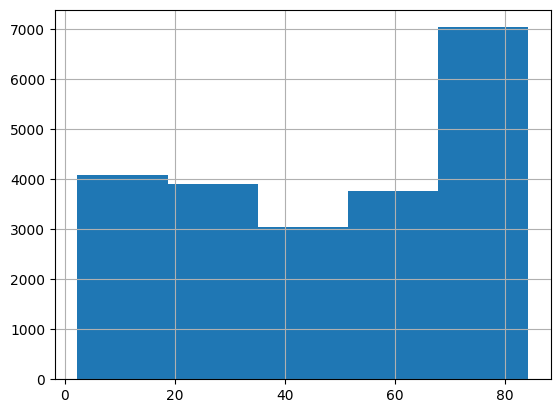

In [74]:
df_mkt['sentiment_percentile'].hist(bins=5)

### Update the labeling based on percentile thresholds

In [81]:
# Calculate percentile thresholds
p25 = df_mkt['bullish_pct'].quantile(0.25)
p75 = df_mkt['bullish_pct'].quantile(0.75)

# Create the classification
df_mkt['market_sentiment'] = 'neutral'  # Start with all neutral
df_mkt.loc[df_mkt['bullish_pct'] <= p25, 'market_sentiment'] = 'bearish'
df_mkt.loc[df_mkt['bullish_pct'] >= p75, 'market_sentiment'] = 'bullish'

print(f"Thresholds: bearish if <= {p25:.1f}%, bullish if >= {p75:.1f}%")
print(f"\nResults: {dict(df_mkt['market_sentiment'].value_counts())}")

Thresholds: bearish if <= 50.0%, bullish if >= 100.0%

Results: {'neutral': np.int64(9255), 'bullish': np.int64(6910), 'bearish': np.int64(5699)}


<Axes: xlabel='market_sentiment'>

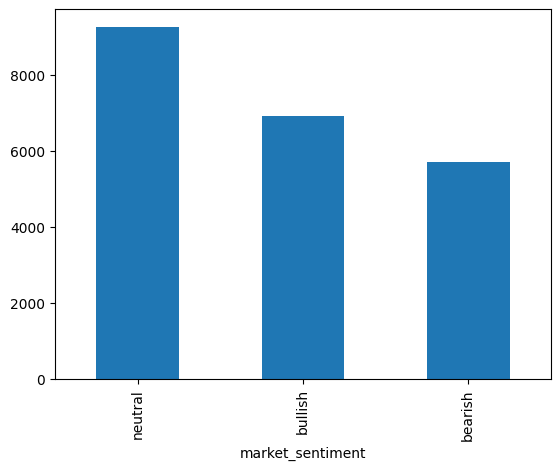

In [27]:
df_mkt['market_sentiment'].value_counts().plot(kind='bar')

#### Using distribution to avoid influence from majority votes

In [86]:
df_mkt['sentiment_rank'] = df_mkt['bullish_pct'].rank(pct=True) * 100

df_mkt['market_sentiment2'] = 'neutral'
df_mkt.loc[df_mkt["sentiment_rank"] <= 25, "market_sentiment2"] = "bearish"
df_mkt.loc[df_mkt["sentiment_rank"] >= 75, "market_sentiment2"] = "bullish"

<Axes: xlabel='market_sentiment2'>

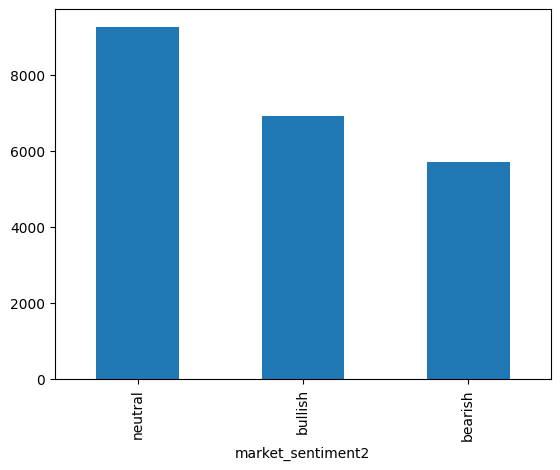

In [87]:
df_mkt['market_sentiment2'].value_counts().plot(kind='bar')

In [84]:
# Count all of the values for each of the categories in the market_sentiment column
df_mkt['market_sentiment'].value_counts()

market_sentiment
neutral    9255
bullish    6910
bearish    5699
Name: count, dtype: int64

In [85]:
# Count all of the values for each of the categories in the market_sentiment column
df_mkt['market_sentiment2'].value_counts()

market_sentiment2
neutral    9255
bullish    6910
bearish    5699
Name: count, dtype: int64

### Using z-score

In [90]:
# Step 1: Calculate sentiment ratio for each article
df_mkt['sentiment_ratio'] = df_mkt['bullish'] / (df_mkt['bearish'] + 1)  # +1 to avoid division by zero

# Step 2: Normalize using z-score (how many standard deviations from mean)
from scipy import stats

df_mkt['sentiment_z_score'] = stats.zscore(df_mkt['sentiment_ratio'])

# Step 3: Classify based on standardized distribution
def classify_by_distribution(z_score):
    if z_score <= -0.67:  # Bottom ~25% of distribution
        return 'bearish'
    elif z_score >= 0.67:  # Top ~25% of distribution
        return 'bullish'
    else:
        return 'neutral'

df_mkt['market_sentiment3'] = df_mkt['sentiment_z_score'].apply(classify_by_distribution)

print("Classification based on distribution:")
print(df_mkt['market_sentiment3'].value_counts(normalize=True) * 100)

Classification based on distribution:
market_sentiment3
neutral    74.364252
bullish    13.675448
bearish    11.960300
Name: proportion, dtype: float64


In [91]:
df_mkt['market_sentiment3'].value_counts()

market_sentiment3
neutral    16259
bullish     2990
bearish     2615
Name: count, dtype: int64

In [89]:
# Count all of the values for each of the categories in the market_sentiment column
df_mkt['market_sentiment2'].value_counts()

market_sentiment2
neutral    9255
bullish    6910
bearish    5699
Name: count, dtype: int64

### Min-Max scaling

In [93]:
from sklearn.preprocessing import MinMaxScaler

# Apply min-max scaling to normalize the distribution
scaler = MinMaxScaler()

df_mkt["bullish_pct_scaled"] = scaler.fit_transform(df_mkt[["bullish_pct"]])

df_mkt['market_sentiment4'] = 'neutral'
df_mkt.loc[df_mkt["bullish_pct_scaled"] <= 25, "market_sentiment4"] = "bearish"
df_mkt.loc[df_mkt["bullish_pct_scaled"] >= 75, "market_sentiment4"] = "bullish"

In [94]:
df_mkt['market_sentiment4'].value_counts()

market_sentiment4
bearish    21848
neutral       16
Name: count, dtype: int64

## Content quality

In [16]:
df.columns

Index(['timestamp', 'title', 'description', 'market_direction',
       'engagement_quality', 'content_characteristics', 'vote_counts',
       'total_votes', 'source_url', 'url', 'bearish', 'bullish', 'liked',
       'disliked', 'important', 'lol', 'toxic'],
      dtype='object')

array([[<Axes: title={'center': 'important'}>,
        <Axes: title={'center': 'lol'}>],
       [<Axes: title={'center': 'toxic'}>, <Axes: >]], dtype=object)

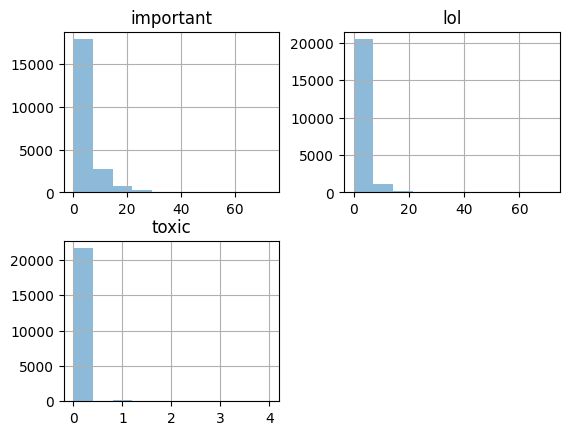

In [45]:
df_qual = df[['important', 'lol', 'toxic']]

df_qual.hist(alpha=0.5, bins=10)

In [46]:
# Count total votes
df_qual['total_votes'] = df_qual['important'] + df_qual['lol'] + df_qual['toxic']

print(f"Filter out for the median of total number of votes {df_qual['total_votes'].median()}")

# Filter out for median number of votes
df_qual = df_qual[df_qual['total_votes'] >= df_qual['total_votes'].median()]

Filter out for the median of total number of votes 5.0


/tmp/ipykernel_201567/3587288596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qual['total_votes'] = df_qual['important'] + df_qual['lol'] + df_qual['toxic']


array([[<Axes: title={'center': 'important'}>,
        <Axes: title={'center': 'lol'}>],
       [<Axes: title={'center': 'toxic'}>, <Axes: >]], dtype=object)

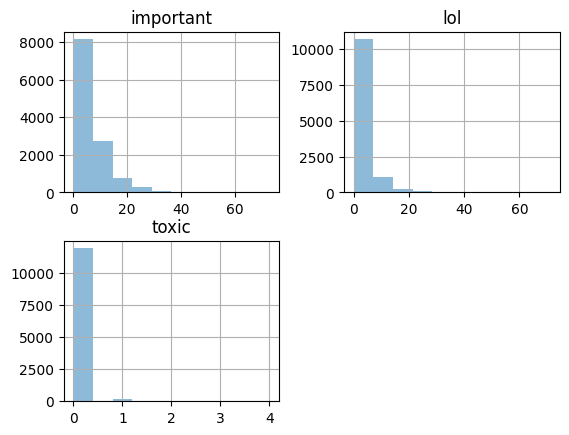

In [47]:
df_qual[['important', 'lol', 'toxic']].hist(alpha=0.5, bins=10)

### Normalize content

In [48]:
# Normalize important, lol, and toxic by total votes
df_qual['important_pct'] = df_qual['important'] / df_qual['total_votes'] * 100
df_qual['lol_pct'] = df_qual['lol'] / df_qual['total_votes'] * 100
df_qual['toxic_pct'] = df_qual['toxic'] / df_qual['total_votes'] * 100

df_qual.head()

,important,lol,toxic,total_votes,important_pct,lol_pct,toxic_pct
year,,,,,,,
2022,5,3,0,8,62.500000,37.500000,0.0
2022,3,3,0,6,50.000000,50.000000,0.0
2022,8,0,0,8,100.000000,0.000000,0.0
2022,6,4,0,10,60.000000,40.000000,0.0
2022,2,4,0,6,33.333333,66.666667,0.0


array([[<Axes: title={'center': 'lol_pct'}>,
        <Axes: title={'center': 'important_pct'}>],
       [<Axes: title={'center': 'toxic_pct'}>, <Axes: >]], dtype=object)

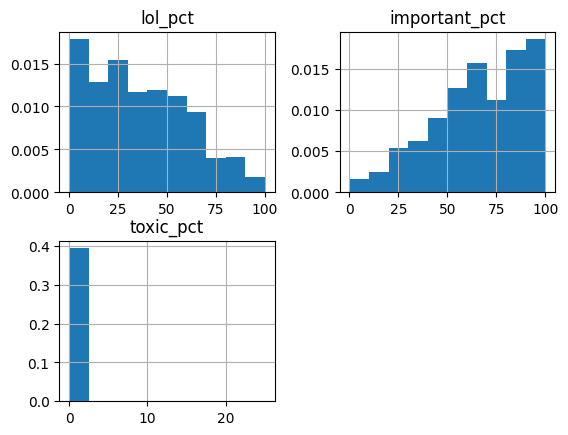

In [50]:
df_qual[['lol_pct', 'important_pct', 'toxic_pct']].hist(density=True, bins=10)

In [51]:
print(f"Total Toxic votes {sum(df_qual['toxic'])}")

Total Toxic votes 227


In [52]:
print(f"Total lol votes {sum(df_qual['lol'])}")

Total lol votes 47107


In [53]:
print(f"Total important votes {sum(df_qual['important'])}")

Total important votes 88887


### Update the labeling based on percentile thresholds

In [54]:
# Calculate percentile thresholds
p25 = df_qual['important_pct'].quantile(0.25)
p75 = df_qual['important_pct'].quantile(0.75)

# Create the classification
df_qual['engagement_quality'] = 'neutral'  # Start with all neutral
df_qual.loc[df_qual['important_pct'] <= p25, 'engagement_quality'] = 'lol'
df_qual.loc[df_qual['important_pct'] >= p75, 'engagement_quality'] = 'important'

print(f"Thresholds: lol if <= {p25:.1f}%, important if >= {p75:.1f}%")
print(f"\nResults: {dict(df_qual['engagement_quality'].value_counts())}")

Thresholds: lol if <= 50.0%, important if >= 84.6%

Results: {'neutral': np.int64(5355), 'lol': np.int64(3692), 'important': np.int64(3045)}


<Axes: xlabel='engagement_quality'>

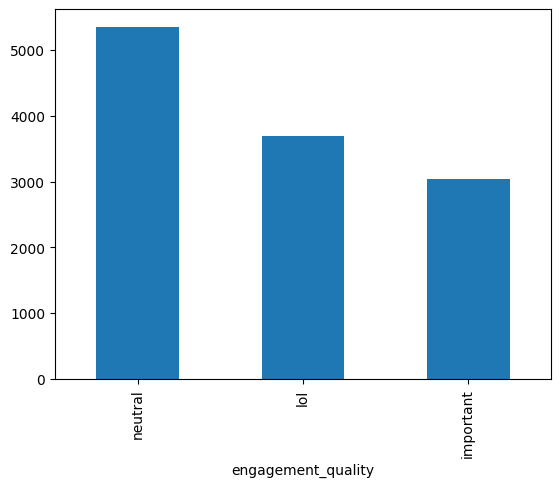

In [55]:
df_qual['engagement_quality'].value_counts().plot(kind='bar')

In [33]:
df_qual.head()

,important,lol,toxic,total_votes,important_pct,lol_pct,toxic_pct,engagement_quality
year,,,,,,,,
2022,1,3,0,4,25.0,75.0,0.0,lol
2022,3,0,0,3,100.0,0.0,0.0,important
2022,2,0,0,2,100.0,0.0,0.0,important
2022,0,1,0,1,0.0,100.0,0.0,lol
2022,2,0,0,2,100.0,0.0,0.0,important


## Content engagement

In [57]:
df.columns

Index(['timestamp', 'title', 'description', 'market_direction',
       'engagement_quality', 'content_characteristics', 'vote_counts',
       'total_votes', 'source_url', 'url', 'bearish', 'bullish', 'liked',
       'disliked', 'important', 'lol', 'toxic'],
      dtype='object')

Filter out for the median of total number of votes 6.0


/tmp/ipykernel_201567/1834781259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engmt['total_votes'] = df_engmt['liked'] + df_engmt['disliked']


array([[<Axes: title={'center': 'liked'}>,
        <Axes: title={'center': 'disliked'}>],
       [<Axes: title={'center': 'total_votes'}>, <Axes: >]], dtype=object)

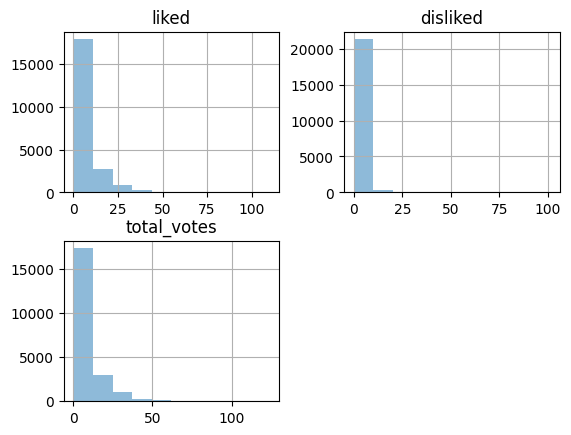

In [61]:
df_engmt = df[['liked', 'disliked']]

df_engmt['total_votes'] = df_engmt['liked'] + df_engmt['disliked']

print(f"Filter out for the median of total number of votes {df_engmt['total_votes'].median()}")
# df_engmt = df_engmt[df_engmt['total_votes'] > df_engmt['total_votes'].median()]

df_engmt.hist(alpha=0.5, bins=10)

### Normalize content

In [63]:
# Normalize important, lol, and toxic by total votes
df_engmt['liked_pct'] = df_engmt['liked'] / df_engmt['total_votes'] * 100
df_engmt['disliked_pct'] = df_engmt['disliked'] / df_engmt['total_votes'] * 100

df_engmt.head()

/tmp/ipykernel_201567/2518126977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engmt['liked_pct'] = df_engmt['liked'] / df_engmt['total_votes'] * 100
/tmp/ipykernel_201567/2518126977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engmt['disliked_pct'] = df_engmt['disliked'] / df_engmt['total_votes'] * 100


,liked,disliked,total_votes,liked_pct,disliked_pct
year,,,,,
2022,3,0,3,100.0,0.0
2022,4,0,4,100.0,0.0
2022,3,2,5,60.0,40.0
2022,1,3,4,25.0,75.0
2022,2,0,2,100.0,0.0


array([[<Axes: title={'center': 'disliked_pct'}>,
        <Axes: title={'center': 'liked_pct'}>]], dtype=object)

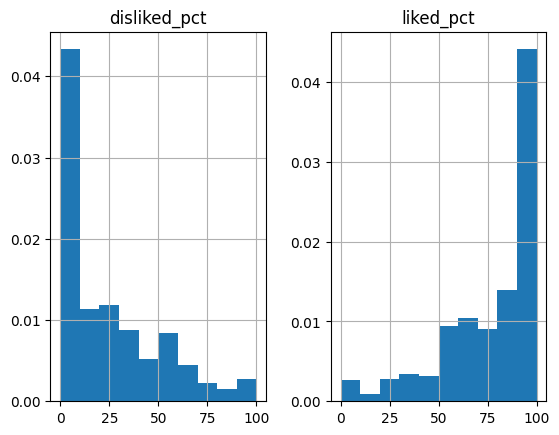

In [64]:
df_engmt[['disliked_pct', 'liked_pct']].hist(density=True, bins=10)